# Rozwiązywanie układów równań liniowych i rozkład LU

Całość kodu można znaleźć w formie online pod linkiem [github.com/KsawerySmoczynski/elementy-metod-numerycznych](https://github.com/KsawerySmoczynski/elementy-metod-numerycznych).

Jest on również dostępny [pod tym linkiem w wersji interaktywnej w Google Colab](https://colab.research.google.com/github/KsawerySmoczynski/elementy-metod-numerycznych/blob/master/Lab4/zmlab4_zadania_i_odpowiedzi.ipynb)  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> <a href="https://github.com/KsawerySmoczynski/elementy-metod-numerycznych/blob/master/Lab4/zmlab4_zadania_i_odpowiedzi"> 


In [1]:
# Żeby odpalić notebook na google colab będziemy musieli zainstalować potrzebne pakiety
import subprocess
import sys
import os

REQUIRED_PACKAGES = ["numpy", "matplotlib", "scipy", "sympy"]
RUN_IN_COLAB = "COLAB_JUPYTER_IP" in os.environ

def install(packages):
    subprocess.check_call([sys.executable, "-m", "pip", "install", *packages])

if RUN_IN_COLAB:
    install(REQUIRED_PACKAGES)

In [2]:
import numpy as np
import scipy as sp

1. Używając polecenia $lu$ (`sp.linalg.lu`) znajdź rozkład LUP poniższych macierzy:
* $A=\left[\begin{array}{ccc}1&3&5\\2&7&9\\3&8&7\end{array}\right]$,
* $A=\left[\begin{array}{ccc}3&1&2\\5&2&3\\-1&-1&-1\end{array}\right]$,
* $A=\left[\begin{array}{cccc}-1&-5&-3&-4\\1&6&4&5\\1&9&6&7\\1&9&7&6\end{array}\right]$.

In [3]:
# (a)
A1 = np.array(
    [
        [1,3,5],
        [2,7,9],
        [3,8,7]
    ]
)
P, L, U = sp.linalg.lu(A1)

In [4]:
# (b)
A2 = np.array(
    [
        [3,1,2],
        [5,2,3],
        [-1,-1,-1]
    ]
)
P, L, U = sp.linalg.lu(A2)

In [5]:
# (c)
A3 = np.array(
    [
        [-1,-5,-3,-4],
        [1,6,4,5],
        [1,9,6,7],
        [1,9,7,6]
    ]
)
P, L, U = sp.linalg.lu(A3)

2. (* 2,5 pkt) Napisz funkcję Doolittle, która dla zadanej macierz $\pmb{A}$ znajduje jej rozkład LU, używając algorytmu Doolittle'a.

In [6]:
def doolitle(A:np.ndarray) -> tuple[np.ndarray]:
    n = A.shape[0]
    L = np.zeros_like(A)
    U = np.zeros_like(A)
    
    for k in range(n):
        L[k,k] = 1
        for j in range(k, n):
            u_dot_LU = 0. if k == 0 else L[k, :k] @ U[:k, j]
            U[k, j] = A[k,j] - u_dot_LU
        for i in range(k+1, n):
            l_dot_LU = L[i, :k] @ U[:k, k]
            L[i,k] = (A[i,k] - l_dot_LU) / U[k,k]
    
    return L, U

In [7]:
L, U = doolitle(A1)
A1, L@U

(array([[1, 3, 5],
        [2, 7, 9],
        [3, 8, 7]]),
 array([[1, 3, 5],
        [2, 7, 9],
        [3, 8, 7]]))

In [8]:
L, U = doolitle(A2)
A2, L@U

(array([[ 3,  1,  2],
        [ 5,  2,  3],
        [-1, -1, -1]]),
 array([[ 3,  1,  2],
        [ 3,  2,  3],
        [ 0, -1, -1]]))

In [9]:
L, U = doolitle(A3)
A3, L@U

(array([[-1, -5, -3, -4],
        [ 1,  6,  4,  5],
        [ 1,  9,  6,  7],
        [ 1,  9,  7,  6]]),
 array([[-1, -5, -3, -4],
        [ 1,  6,  4,  5],
        [ 1,  9,  6,  7],
        [ 1,  9,  7,  6]]))

3. (* 2,5 pkt) Napisz funkcję, która dla macierzy $A$, wektora $b$, wektora początkowego $x0$ i parametrów związanych z kryteriami stopu rozwiązuje układ równań liniowych $Ax=b$ za pomocą metody Jacobiego.

In [10]:
A = np.array(
    [
        [6, -1, -1],
        [1, 6, 1],
        [0, 1, 6]
    ]
)
b = np.array([7, -10, 4])
x_0 = np.zeros(3)

In [11]:
def jacobi(A:np.ndarray, b:np.ndarray, x:np.ndarray, epsilon=1e-10) -> np.ndarray:
    x_prev = x.copy()
    x_curr = (b - (A@x - np.diag(A) * x)) / np.diag(A)
    iteration = 1
    while np.abs((x_prev - x_curr)).sum() > epsilon:
        print(f"Iteration {iteration}")
        x_prev = x_curr.copy()
        x_curr = (b - (A@x_prev - np.diag(A) * x_prev)) / np.diag(A)
        iteration +=1 
    
    return x_curr
jacobi(A, b, x_0)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14


array([ 1., -2.,  1.])

4. (* 2,5 pkt) Napisz funkcję, która dla macierzy $A$, wektora $b$, wektora początkowego $x0$ i parametrów związanych z kryteriami stopu rozwiązuje układ równań liniowych $Ax=b$ za pomocą metody Gaussa-Seidela.

In [12]:
def gauss_seidel(A:np.ndarray, b:np.ndarray, x:np.ndarray, epsilon=1e-10) -> np.ndarray:
    x_prev = x.copy()
    x_curr = np.zeros_like(x_prev)
    for i in range(x.shape[0]):
            x_curr[i] = (b[i] - x_curr[:i] @ A[i, :i] - x_prev[i+1: ] @ A[i, i+1:]) / A[i, i]
    iteration = 1
    while np.abs((x_prev - x_curr)).sum() > epsilon:
        print(f"Iteration {iteration}")
        x_prev = x_curr.copy()
        for i in range(x.shape[0]):
            x_curr[i] = (b[i] - x_curr[:i] @ A[i, :i] - x_prev[i+1: ] @ A[i, i+1:]) / A[i, i]
        iteration += 1
    return x_curr
gauss_seidel(A, b, x_0)
        

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6


array([ 1., -2.,  1.])

5. (* 2,5 pkt) Napisz funkcję, która dla macierzy $A$, wektora $b$, wektora początkowego $x0$, parametru $\omega$ i parametrów związanych z kryteriami stopu rozwiązuje układ równań liniowych $Ax=b$ za pomocą metody nadrelaksacji.

In [13]:
def SOR(A:np.ndarray, b:np.ndarray, x:np.ndarray, omega:float, epsilon=1e-10) -> np.ndarray:
    x_prev = x.copy()
    x_curr = np.zeros_like(x_prev)
    for i in range(x.shape[0]):
            x_curr[i] = omega * (b[i] - x_curr[:i] @ A[i, :i] - x_prev[i+1: ] @ A[i, i+1:]) / A[i, i] + (1-omega) * x_prev[i]
    iteration = 1
    while np.abs((x_prev - x_curr)).sum() > epsilon:
        print(f"Iteration {iteration}")
        x_prev = x_curr.copy()
        for i in range(x.shape[0]):
            x_curr[i] = omega * (b[i] - x_curr[:i] @ A[i, :i] - x_prev[i+1: ] @ A[i, i+1:]) / A[i, i] + (1-omega) * x_prev[i]
        iteration += 1
    return x_curr
omega = 1.25
SOR(A, b, x_0, omega)
        

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21


array([ 1., -2.,  1.])

# Rozkład macierzy według wartości szczególnych (SVD)

1. Korzystając z funkcji **svd** (np.linalg.svd) w Scilabie znajdz rozwiązania minimalne poniższych układów równań:
* $\begin{cases}
        x_1+x_2=3\\
        x_1+x_2=6
    \end{cases}$
    
* $\begin{cases}
        x_1+3x_2+4x_3=5\\
        -2x_1-6x_2-8x_3=-10
    \end{cases}$	

Polecenie $[V,S,U]=svd(A)$ zwraca macierze $V,S,U$ takie, że $A=VSU^{*}$.

In [14]:
# 1.a Układ jest sprzeczny!
A = np.array(
    [[1.,1.],
     [1.,1.]]
)
b = np.array([3., 6.])


In [15]:

U, S, Vh = np.linalg.svd(A, compute_uv=True)
S_for_plus = np.round(S.copy(), 10)
S_for_plus[S_for_plus != 0] = (1/S)[S_for_plus != 0]
A_plus = U @ np.diag(S_for_plus) @ Vh


In [16]:
np.allclose(A@A_plus@A, A), np.allclose(A_plus@A@A_plus, A_plus), np.allclose(np.conjugate(A@A_plus), A@A_plus), np.allclose(np.conjugate(A_plus@A), A_plus@A)

(True, True, True, True)

In [17]:
A_plus @ b

array([2.25, 2.25])

In [18]:
# 1.b
A = np.array(
    [
        [1, 3, 4],
        [-2, -6, -8]
    ]
)
b = np.array([5, -10])

U, S, Vh = np.linalg.svd(A, full_matrices=True, compute_uv=True)
S_for_plus = np.round(S.copy(), 10)
S_for_plus[S_for_plus != 0] = (1/S)[S_for_plus != 0]
A_plus = U @ np.diag(S_for_plus) @ Vh[:-1, :]


In [19]:
A_plus[:, :-1] @ b

array([-0.19230769,  0.38461538])

2. (* 2 pkt)
* Wygeneruj wektor $x$ $50$ równomiernie rozłożonych punktów w przedziale $[1,10]$.
* Wygeneruj wektor $a$ 50 losowo wybranych punktów z przedziału $[2,3]$.
* Wygeneruj wektor $b$ 50 losowo wybranych punktów z przedziału $[-1,0]$.
* Narysuj wykres $y=b.*x^2+a.*x$.
* Za pomocą SVD znajd\'z wielomian $f(x)=b_0x^2+a_0x$, który najlepiej aproksymuje punkty $(x,y)$ i narysuj jego wykres.


In [20]:
# a.
x = np.linspace(1, 10, 50)
# b.
a = np.random.uniform(2, 3, 50)
# c.
b = np.random.uniform(-1, 0, 50)

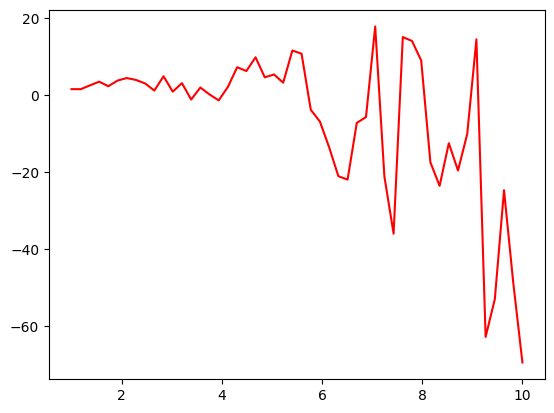

In [21]:
from matplotlib import pyplot as plt

# d.
y = b * x ** 2 + a * x

fig, ax = plt.subplots()
ax.plot(x, y, c="r", label="Original function")
plt.show()

In [22]:
A = np.c_[x**2, x]
U, S, Vh = np.linalg.svd(A, compute_uv=True)
S_for_plus = S.copy()
S_for_plus[S_for_plus != 0] = (1/S)[S_for_plus != 0]
A_plus = U[:, :2] @ np.diag(S_for_plus) @ Vh
b_0, a_0 = A_plus.T @ y
b_0, a_0

(-0.8682382999831024, 4.861275097366224)

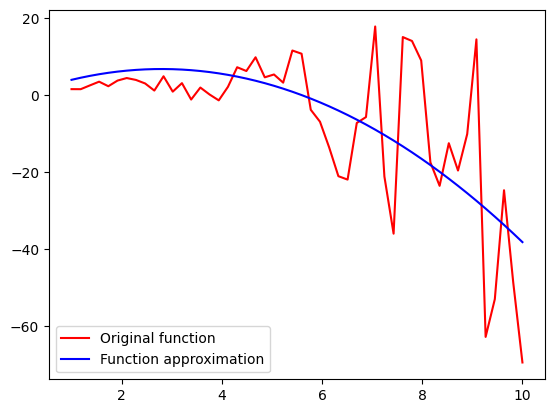

In [23]:
# e.
y = b * x ** 2 + a * x
y_approx = b_0 * x ** 2 + a_0 * x

fig, ax = plt.subplots()
ax.plot(x, y, c="r", label="Original function")
ax.plot(x, y_approx, c="b", label="Function approximation")
plt.legend()
plt.show()